In [130]:
%matplotlib inline
import numpy as np
import bayesian_pdes as bpdes
import six
import sympy as sp
import matplotlib.pyplot as plt

# Forward Problem

In [131]:

t,tbar = sp.symbols('t tbar')
x, y = sp.symbols('x y')
l, alpha = sp.symbols('l, alpha')
T = lambda k: k.diff(t) - alpha*k.diff(x,x)
T_bar = lambda k: k.diff(tbar) - alpha*k.diff(y,y)
B = lambda k: k
B_bar = lambda k: k
k = sp.exp(-(x-y)**2 / (2*l**2))*sp.exp(-(t-tbar)**2 / (2*l**2))
op_system = bpdes.operator_compilation.compile_sympy([T, B], [T_bar, B_bar], k, [[x,t], [y, tbar], [l, alpha]], mode='cython')

In [132]:
L = 1.

In [133]:
def g(x):
    return np.zeros_like(x)

In [276]:
def u_0(x):
    return np.zeros_like(x)

In [157]:
x_pts = np.linspace(0,L,21)[:,None]
interior = x_pts[1:-1]

In [289]:
mu_0 = u_0(x_pts)
dt = 0.01
times = np.arange(dt, 2, dt)
mus = np.empty((x_pts.shape[0], times.shape[0]))
last_mu = mu_0.ravel()
for ix, t in enumerate(times):
    last_bdy = last_mu[[0, -1], None]
    last_interior = last_mu[1:-1, None]
    
    bdy_obs = (np.array([[0., t], [L, t]]), np.array([[1., 1.]]).T - last_bdy)
    interior_obs = (np.column_stack([interior, t*np.ones_like(interior)]), g(interior) - last_interior)
    obs = [interior_obs, bdy_obs]
    
    posterior = bpdes.collocate(op_system.operators, op_system.operators_bar, None, None, obs, op_system, fun_args=np.array([0.1, 1.0]))
    
    mu, cov = mu, cov = posterior(np.column_stack([x_pts, t*np.ones_like(x_pts)]))
    mus[:,ix] = last_mu.ravel() + mu.ravel()
    last_mu = mus[:,ix].ravel()

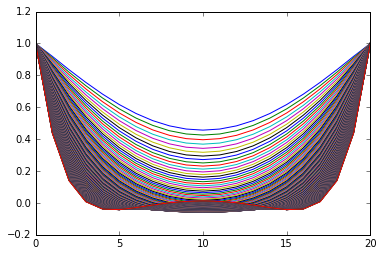

In [290]:
plt.plot(mus);

In [257]:
last_mu

array([ 1.        ,  0.26579673,  0.003854  , -0.04753821, -0.0355826 ,
       -0.01343515,  0.00208425,  0.0096412 ,  0.01187031,  0.01190375,
        0.01167119,  0.01190375,  0.01187031,  0.0096412 ,  0.00208425,
       -0.01343515, -0.0355826 , -0.04753821,  0.003854  ,  0.26579673,  1.        ])

In [234]:
mu

array([[ 1.        ],
       [ 0.57113158],
       [ 0.29108726],
       [ 0.12495916],
       [ 0.03168086],
       [-0.01555591],
       [-0.0356446 ],
       [-0.04105872],
       [-0.04004447],
       [-0.03761853],
       [-0.03653159],
       [-0.03761853],
       [-0.04004447],
       [-0.04105872],
       [-0.0356446 ],
       [-0.01555591],
       [ 0.03168086],
       [ 0.12495916],
       [ 0.29108726],
       [ 0.57113158],
       [ 1.        ]])

In [180]:
posterior = bpdes.collocate(op_system.operators, op_system.operators_bar, None, None, obs, op_system, fun_args=np.array([0.1, 1.0]))

In [181]:
mu, cov = posterior(np.column_stack([x_pts, dt*np.ones_like(x_pts)]))

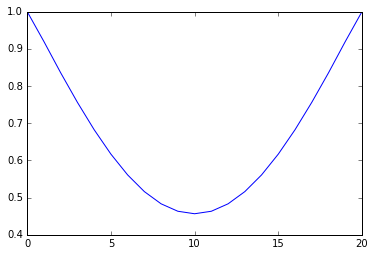

In [182]:
plt.plot(mu)

In [142]:
# this gives the propagation of IID noise
def sequential_parabolic():
    

IndentationError: expected an indented block (<ipython-input-142-a4fb6f8e8444>, line 3)

In [ ]:
# so now, how to proceed. I know H === I. I know \Phi = some linear operator. 